# Linear Regression with Seaborn

🚀 Let's start with using Seaborn to do a Linear Regression visually!

Our objective is to get an initial understanding of:
- `orders` properties and
- their associated `review_scores`

In [2]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
# Import Modules
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

⚠️ Before you proceed:
* 💾 Download the solution for the previous unit's Orders challenge
* 👥 Copy-paste the content of `order_solution.py` into your `olist/order.py` file

⚠️ Don't forget to also commit the code changes in `order.py` in your `olist` repo!

👇 First things first, import the `orders` dataset

In [4]:
# Import your orders training set
from olist.order import Order

orders = Order().get_training_data(with_distance_seller_customer=False)

## 1 - Inspect feature correlation

❓Inspect the various correlations between features: which feature seems to the most correlated with `review_score`?

<details>
    <summary>▸ Hint</summary>

* Use `DataFrame.corr(numeric_only=True)` combined with `sns.heatmap()` and `cmap='coolwarm'`
* Have a look at the absolute values of the correlation coefficients of `review_score` vs. each feature,
    * the higher the coefficient, the more one given feature is correlated (positively or negatively) with the `review_score`

</details>

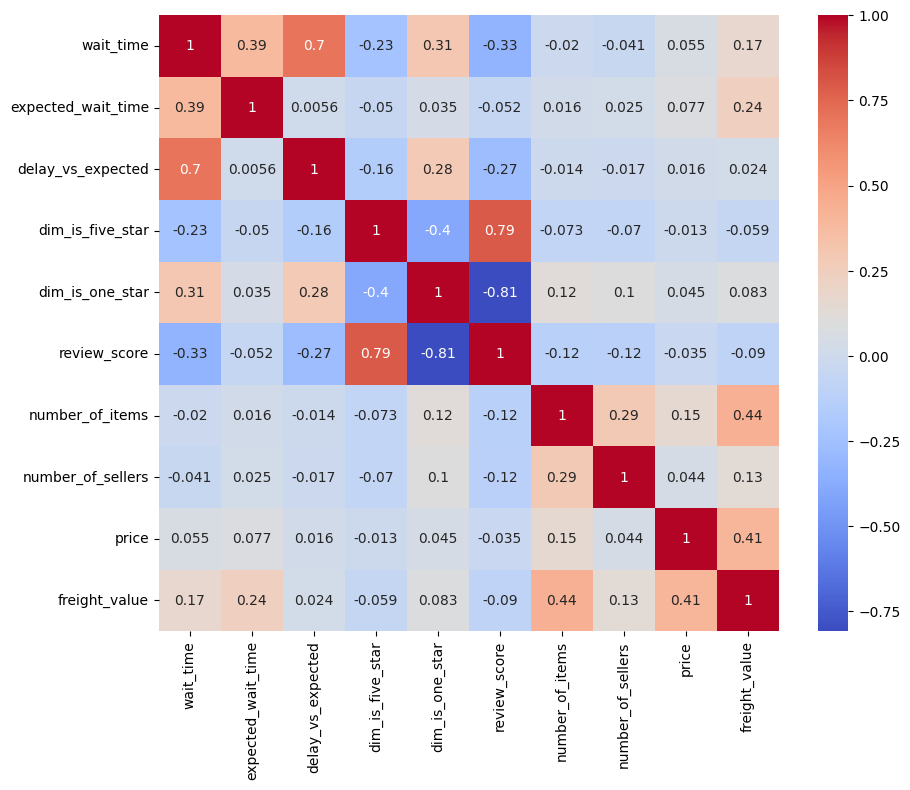

<class 'pandas.core.frame.DataFrame'>
Index: 96353 entries, 0 to 96360
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   order_id            96353 non-null  object 
 1   wait_time           96353 non-null  float64
 2   expected_wait_time  96353 non-null  float64
 3   delay_vs_expected   96353 non-null  float64
 4   order_status        96353 non-null  object 
 5   dim_is_five_star    96353 non-null  int64  
 6   dim_is_one_star     96353 non-null  int64  
 7   review_score        96353 non-null  int64  
 8   number_of_items     96353 non-null  int64  
 9   number_of_sellers   96353 non-null  int64  
 10  price               96353 non-null  float64
 11  freight_value       96353 non-null  float64
dtypes: float64(5), int64(5), object(2)
memory usage: 9.6+ MB


In [25]:
corr = orders.corr(numeric_only=True)
corr

plt.figure(figsize=(10,8))
sns.heatmap(corr, cmap='coolwarm', annot=True)
plt.show()
orders.info()

* 😏 _Captain Obvious :_
    * `review_score` is 100% correlated to itself 
    * and strongly correlated to `dim_is_one_star` and `dim_is_five_star`...
* ⚠️ The two next highest correlation coefficients with respect to the `review_score` are :
    * `wait_time` : - 34 %
    * `delay_vs_expected` : - 27 %

## 2. Linear regression of `review_score` against delivery duration

👉 So, it seems that `review_score` is mostly correlated with `wait_time` (= - 34%) and `delay_vs_expected` (- 27%).

🎨 Let's investigate these correlations  with `seaborn`

### 2.1 Plots
❓ Create 2 plots, that regress `review_score` on `wait_time` and `delay_vs_expected` respectively.

<u>Tips</u>:

- Reduce your dataframe to a random sub-`sample of 10,000 rows` for speed purposes (a good practice in data exploration)
- Use `DataFrame.sample()` with a fixed `random_state` to avoid changing the sample at each execution if needed
- Use `sns.regplot()` to plot the `regression lines`
- Add some `y_jitter` parameters to better visualize the scatterplot density
- Limit `xlim` and `ylim` to hide outliers by adding this right after your `sns.regplot()` (in the same cell):
  ```python
  plt.xlim(right=70)
  plt.ylim(bottom=0)
  ```

In [32]:
sample_df=orders.sample(1000)
sample_df

,order_id,wait_time,expected_wait_time,delay_vs_expected,order_status,dim_is_five_star,dim_is_one_star,review_score,number_of_items,number_of_sellers,price,freight_value
21731,f5e409c4e093a36f74d9ba76df3b5f19,21.965382,23.216562,0.0,delivered,0,0,3,1,1,44.99,16.11
9666,4797a73f61aa08ea719cddf0337af350,9.359005,19.593530,0.0,delivered,0,0,4,1,1,67.50,11.97
35527,d29d63928559ca53630a4e064a42381a,14.088993,38.518333,0.0,delivered,1,0,5,1,1,99.00,25.18
9554,b6b01d3d01c6df1ff950084e0f9ec7f4,13.845741,17.121505,0.0,delivered,1,0,5,1,1,69.90,14.22
43290,0b71862ee9cbb65cc3da31466a6c2990,7.051481,13.218657,0.0,delivered,0,0,4,1,1,29.98,7.78
...,...,...,...,...,...,...,...,...,...,...,...,...
7831,1d309784fd7cb2fc8c74ef03c942426c,4.449664,17.566250,0.0,delivered,0,0,2,1,1,13.99,7.78
82972,7a3f8080c604ded6519cd5b601f690b7,24.068889,29.521782,0.0,delivered,1,0,5,1,1,141.64,34.53
43605,5dc6b1dfab4fc8303ea318faec36a73e,27.041910,28.164363,0.0,delivered,1,0,5,1,1,349.00,17.19
15476,64f1dbc00645c1bd7e70f69b19f95976,9.201042,18.150185,0.0,delivered,1,0,5,1,1,289.00,19.30


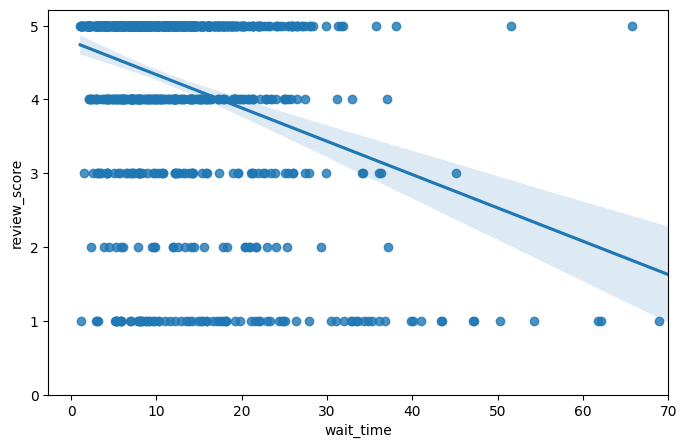

In [39]:
plt.figure(figsize=(8,5))
sns.regplot(x='wait_time', y='review_score', data=sample_df)
plt.xlim(right=70)
plt.ylim(bottom=0)
plt.show()


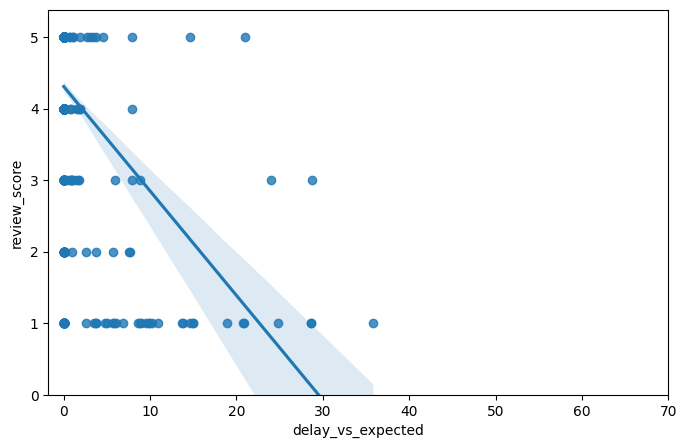

In [40]:
plt.figure(figsize=(8,5))
sns.regplot(x='delay_vs_expected', y='review_score', data=sample_df)
plt.xlim(right=70)
plt.ylim(bottom=0)
plt.show()

ℹ️ What did `regplot` do ? 

👉 It tried to perform a `Linear Regression` of the `review_score` vs. `wait_time` and `delay_vs_exp`

🧐 It doesn't look so interpretable, does it ?

👉 You are right: we have only 5  different review scores which can be interpreted as a categorical variable with five different possible values (for example: "very bad", "bad", "average", "good" and "very good") that we are trying to regress against two continuous values that are `wait_time` and `delay_vs_exp`.

👀 However, based on the regression lines, we can see a very intuitive pattern: the longer the waiting time and/or the delay, the lower the review score - not surprising. But how fast does the review score decrease ?


### 2.2 Interpretation

❓Try to visually "compute" the `slope` of each curve. 

✍️ Write down, in plain English, how you would interpret these coefficients if you were to explain it to a non-data-educated audience.

<details>
    <summary>Answer</summary>

- `Slope wait_time ≈ -0.05` : "For each additional day waiting for an order to be delivered, the review score on average is reduced by 0.05"
- `Slope delay ≈ -0.1` : "For each additional day waiting for an order to be delivered _after the ETA_, the review score on average is reduced by 0.1"

❓ Are you surprised that the delay seems more impactful than the waiting time? 

👉 You may be impatient to receive your order and would like a small wait time, but you would be even more disappointed to receive your package after the expected delivery date!

</details>

### 2.3 Inferential analysis

Even if we had used all 100,000 orders for these regplots, these orders represent only 16 months of data after all...

⚠️⚠️⚠️ **How certain** are we that these coefficients are **statistically significant**? ⚠️⚠️⚠️

⚡️ Questions about the statistical significance of these coefficients:

* Are these coefficients able to generalize well to future orders (all else being equal) ? (*Ideal answer: Yes*) 
* Are we sure that these coefficients do not simply capture random fluctuations due to the limited observation period ? (*Ideal answer: No*) 

🧐 We need to estimate the **`confidence interval`** around the mean value for these two slopes  :
$$slope_{wait} = -0.05 ± \ ?? \ \text{[95\% interval]} $$
$$slope_{delay} = -0.1 ± \ ?? \ \text{[95\% interval]} $$

⭐️ Fortunately, `Seaborn` already computes this 95% confidence interval for us with a shaded blue cone around the regression line!

❓Use `Seaborn` `regplot` again to visualize the two confidence intervals:
- Change the `size of your sample dataset`: 
    - Notice how the slope changes as the sample size becomes smaller. 
    - What about the confidence interval?
- Change the `size of the confidence interval` by playing with the regplot parameter called `ci` (95% by default)

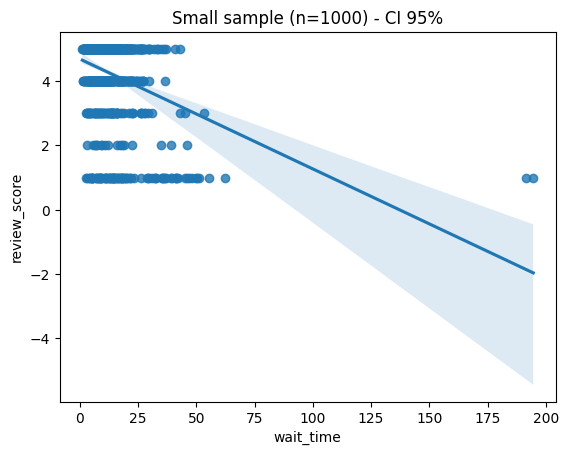

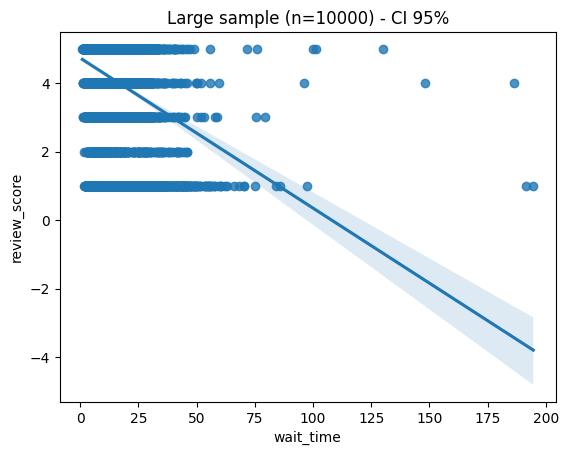

In [41]:
sample_small = orders.sample(1000, random_state=42)
sns.regplot(x='wait_time', y='review_score', data=sample_small, ci=95)
plt.title("Small sample (n=1000) - CI 95%")
plt.show()

# 2️⃣ Exemple avec un grand échantillon
sample_large = orders.sample(10000, random_state=42)
sns.regplot(x='wait_time', y='review_score', data=sample_large, ci=95)
plt.title("Large sample (n=10000) - CI 95%")
plt.show()


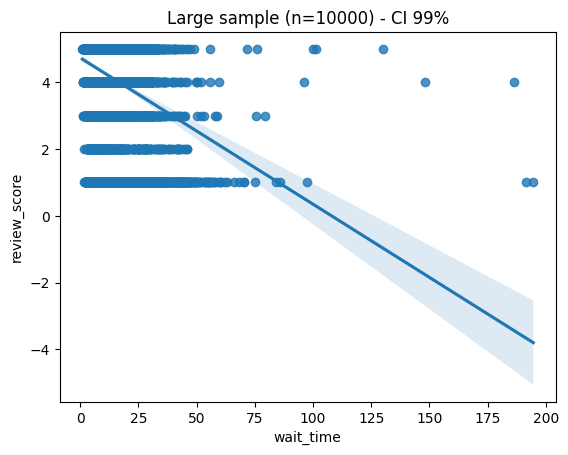

In [42]:
# 3️⃣ Exemple avec un autre intervalle de confiance (par ex. 99%)
sns.regplot(x='wait_time', y='review_score', data=sample_large, ci=99)
plt.title("Large sample (n=10000) - CI 99%")
plt.show()

🔎 Interpretation:

* **Null Hypothesis** $H_0$ : "this variable does not influence the review score", a.k.a its coefficient is equal to zero

When plotting all our datapoints:
- The 95% confidence interval for the slope does not contain the value 0.
    - 👉 We are `95% confident that slower deliveries are associated with weaker reviews`.
- The **`p-value`** associated with the null hypothesis "the impact of delivery time on review scores is almost zero" is lower than 5%
    - 👉 We can safely reject this null hypothesis and consider the **`alternative hypothesis`** = `"the delivery time has an impact on the review score"` 

🔥 Our findings are said to be **statistically significant**. 

⚠️ However, **correlation does NOT imply causality**. 

- It can be inherently slower to deliver certain products (e.g.heavy products)
    - These categories of products will often have a low review_score, not matter how long their delivery time is. 

👉 Identifying **confounding factor** is crucial and cannot be done with a simple univariate regression. 

🗓 Cf. `Lecture 3 - Linear Regression` : we will talk about **`multivariate linear regression`**. 
</details>



---
🏁 Congratulations! 

🙏 Don't forget to `commit` and `push` your notebook